## Домашнее задание
Практическое задание:
- взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- сделать обзорный анализ выбранного датасета
- сделать feature engineering
- обучить любой классификатор (какой вам нравится)
- разобраться с SHAP и построить важности признаков для:
- всего тестового набора данных (summary_plot - дать интерпретацию)
- для топ 10%
- для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

## Bank Marketing Data Set

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("bank.csv", sep=';')
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [2]:
list_replace = ['default', 'housing', 'loan', 'y']

Эти данные связаны с кампаниями прямого маркетинга португальского банковского учреждения. Маркетинговые кампании основывались на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы получить доступ, будет ли продукт (срочный банковский депозит) подписан («да») или нет («нет»).

### Информация об атрибутах:

Входные переменные:
#### данные клиента банка:
1 - возраст (числовой)
2 - работа: тип работы (категориальный: «администратор», «синий воротничок», «предприниматель», «домработница», «менеджмент», «пенсионер» , «самозанятый», «услуги», «студент», «техник», «безработный», «неизвестен»)
3 - в браке: семейное положение (категориальное: «разведен», «женат», «холост», «неизвестен». '; примечание:' разведенный 'означает разведенный или овдовевший)
4 - образование (категориальные:' basic.4y ',' basic.6y ',' basic.9y ',' high.school ',' неграмотный ',' professional.course ' ',' university.degree ',' unknown ')
5 - по умолчанию: есть кредит по умолчанию? (категорично: 'нет', '
да »,« неизвестно ») 6 - жилье: есть жилищная ссуда? (категорично: «нет», «да», «неизвестно»)
7 - заем: есть ли личный заем? (категорично: «нет», «да», «неизвестно»)
#### связанный с последним контактом текущей кампании:
8 - контакт: тип связи контакта (категориальный: 'сотовый', 'телефон')
9 - месяц: последний месяц контакта в году (категориальный: 'jan', 'feb', ' мар ', ...,' ноя ',' декабрь ')
10 - day_of_week: последний контактный день недели (категориальный:' пн ',' вт ',' ср ',' чт ',' пт ')
11 - duration: продолжительность последнего контакта в секундах (числовое значение). Важное примечание: этот атрибут сильно влияет на цель вывода (например, если длительность = 0, то y = «нет»). Тем не менее, продолжительность вызова до выполнения вызова неизвестна. Кроме того, после окончания звонка, очевидно, известно y. Таким образом, эти входные данные следует включать только для целей эталонного тестирования и от них следует отказаться, если предполагается получить реалистичную прогностическую модель.
#### другие атрибуты:
12 - кампания: количество контактов, выполненных во время этой кампании и для этого клиента (числовое, включая последний контакт)
13 - дней: количество дней, прошедших после того, как с клиентом последний раз связались из предыдущей кампании (числовое; 999 означает, что клиент не был ранее связывался)
14 - предыдущий: количество контактов, выполненных до этой кампании и для этого клиента (числовое значение)
15 - poutcome: результат предыдущей маркетинговой кампании (категориальные: «неудача», «несуществующий», «успех»)
#### социальные и экономические атрибуты контекста
16 - emp.var.rate: уровень вариации занятости - квартальный показатель (числовой)
17 - cons.price.idx: индекс потребительских цен - месячный показатель (числовой)
18 - cons.conf.idx: индекс доверия потребителей - месячный показатель (числовой)
19 - euribor3m: 3-месячная ставка euribor - дневной показатель (числовой)
20 - кол-во занятых: количество сотрудников - квартальный показатель (числовой)

Выходная переменная (желаемая target):
21 - y - подписался ли клиент на срочный депозит? (двоичный: «да», «нет»)

In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data[list_replace].value_counts()

default  housing  loan  y  
no       yes      no    no     1927
         no       no    no     1381
         yes      yes   no      370
         no       no    yes     279
                  yes   no      255
         yes      no    yes     192
yes      yes      no    no       31
no       yes      yes   yes      25
         no       yes   yes      16
yes      no       no    no       13
                  yes   no       12
         yes      yes   no       11
         no       no    yes       4
         yes      no    yes       3
         no       yes   yes       2
dtype: int64

In [6]:
for col in list_replace:
    data.replace({col: {'yes': 1, 'no': 0}}, inplace=True)

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [8]:
dict_month = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
              'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct':10,
              'nov': 11, 'dec':12}

In [9]:
data.replace({'month': dict_month}, inplace=True)

In [10]:
data['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [11]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,7,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,5,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,8,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,2,129,4,211,3,other,0


In [12]:
from sklearn.model_selection import train_test_split

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=12, shuffle=True, stratify=y_data)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

In [14]:
continuos_cols = ['age', 'balance', 'duration', 'pdays']
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
base_cols = ['default', 'housing', 'loan', 'day', 'month', 'campaign', 'previous']

continuos_transformers = []
cat_transformers = []
base_transformers = []

cat_cols_ohe = []

for clmn in cat_cols:
    cat_cols_ohe.append([col for col in pd.get_dummies(x_train[clmn], prefix=clmn).columns])
    
print(cat_cols_ohe)

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))
    
for base_col in base_cols:
    base_transformer = Pipeline([
                ('selector', NumberSelector(key=base_col))
            ])
    base_transformers.append((base_col, base_transformer))

[['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown'], ['marital_divorced', 'marital_married', 'marital_single'], ['education_primary', 'education_secondary', 'education_tertiary', 'education_unknown'], ['contact_cellular', 'contact_telephone', 'contact_unknown'], ['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']]


In [15]:
list_ohe = []
for el in cat_cols_ohe:
    list_ohe.extend(el)
list_ohe

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [16]:
feats = FeatureUnion(continuos_transformers+cat_transformers+base_transformers)
feature_processing = Pipeline([('feats', feats)])

x_train_ = feature_processing.fit_transform(x_train)
x_test_ = feature_processing.fit_transform(x_test)

In [17]:
y_train[y_train == 1]

4505    1
3073    1
30      1
99      1
3853    1
       ..
2837    1
1464    1
3305    1
204     1
581     1
Name: y, Length: 365, dtype: int64

In [18]:
y_train[30]

1

In [19]:
pd.DataFrame(feature_processing.fit_transform(x_train),
             columns=continuos_cols+list_ohe+base_cols)

,age,balance,duration,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_other,poutcome_success,poutcome_unknown,default,housing,loan,day,month,campaign,previous
0,-0.672876,-0.334630,-0.622841,-0.402190,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,16.0,7.0,3.0,0.0
1,1.397659,-0.248820,-0.794361,-0.402190,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2.0,6.0,1.0,0.0
2,-1.802259,-0.085029,-0.554233,-0.402190,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,16.0,6.0,1.0,0.0
3,-0.296415,0.279423,-0.077788,-0.402190,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,13.0,5.0,1.0,0.0
4,-0.390531,-0.321906,-0.207381,-0.402190,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,26.0,5.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,-1.425798,-0.422073,0.345296,-0.402190,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,7.0,1.0,0.0
3160,0.080046,-0.463836,-0.763869,-0.402190,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,7.0,7.0,2.0,0.0
3161,0.174161,-0.068715,-0.215004,-0.402190,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,6.0,5.0,3.0,0.0
3162,-1.331683,2.265796,0.737887,3.105306,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0


In [20]:
x_train_ = pd.DataFrame(x_train_, columns=continuos_cols+list_ohe+base_cols)
x_test_ = pd.DataFrame(x_test_, columns=continuos_cols+list_ohe+base_cols)

In [21]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=4, n_estimators=100, reg_lambda=0.8, use_label_encoder=False, random_state=12, subsample=0.3)

model.fit(x_train_, y_train)
y_predict = model.predict(x_test_)

[12:40:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

table = {
    'model': [],
    'f1': [],
    'ROC-AUC': [],
    'recall': [],
    'precision': []
}

def evaluate_results(y_test, y_predict, name):
    table['model'].append(name)
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    table['f1'].append(f1)
    print("f1: %.2f%%" % (f1 * 100.0))
    roc = roc_auc_score(y_test, y_predict)
    table['ROC-AUC'].append(roc)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    table['recall'].append(rec)
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    table['precision'].append(prc)
    print("precision: %.2f%%" % (prc * 100.0)) 

    
evaluate_results(y_test, y_predict, 'default')

Classification results:
f1: 52.70%
roc: 72.42%
recall: 50.00%
precision: 55.71%


In [23]:
import shap
import matplotlib.pyplot as plt

%matplotlib inline

shap.initjs()

In [24]:
# model = xgb.train({"learning_rate": 0.01}, 
#                       xgb.DMatrix(x_train_, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train_)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


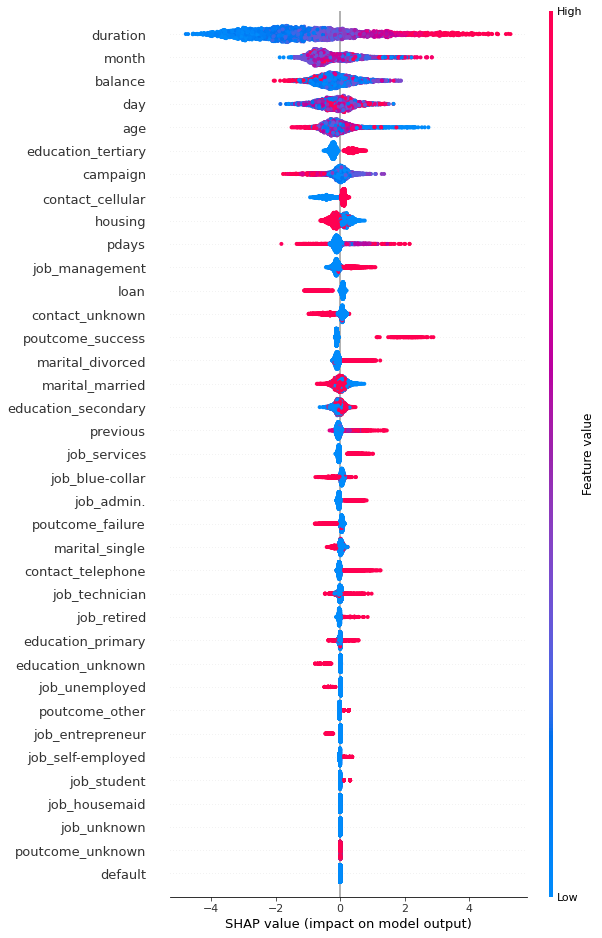

In [25]:
shap.summary_plot(shap_values, x_train_, max_display=0)

Согласно графику чем выше продолжительность разговора, тем выше вероятность оформления депозита (исходя из значений этой фичи можно предположить, что положительное решение коиент принимает при длительности звонка более 4 минут).
Летний период в большинстве случаев вносит отрицательный вклад в принятие решения, внезапно, а контакты в конце года вносят положительный вклад.
В среднем чем выше балланс, тем больше отрицательный вклад фичи.
В конце месяца значение фичи 'day' вносит больший вклад, чем в середине месяца, причем вклад положительный.
Молодые клиенты более охотно оформляют депозит, чем возрастные.
Остальные фичи вносят меньший вклад, но там более яркое деление.
Так наличие высшего образования вносит положительный вклад в принятие решения.
Закономерный вывод - если коиента чрезмерно долбить звонками он откажется от услуги.


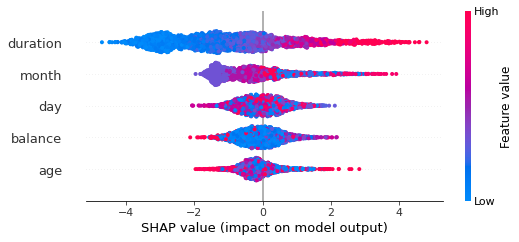

In [32]:
shap.summary_plot(shap_values, x_train_[['duration', 'month', 'balance', 'day', 'age']], max_display=5)

In [35]:
x_train.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,41.149494,0.016751,1421.602718,0.555942,0.154867,15.857143,6.195322,264.408344,2.792035,39.133059,0.548989
std,10.626952,0.128357,3065.365982,0.496939,0.361835,8.219896,2.385360,262.401127,3.062483,99.802044,1.745724
min,19.000000,0.000000,-2082.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,64.000000,0.000000,0.000000,8.000000,5.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,0.000000,438.500000,1.000000,0.000000,16.000000,6.000000,186.500000,2.000000,-1.000000,0.000000
75%,49.000000,0.000000,1453.000000,1.000000,0.000000,21.000000,8.000000,330.250000,3.000000,-1.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000


In [33]:
x_train_.describe()

,age,balance,duration,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_other,poutcome_success,poutcome_unknown,default,housing,loan,day,month,campaign,previous
count,3.164000e+03,3.164000e+03,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,...,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,2.433087e-16,6.821345e-17,-9.267064e-17,-4.251059e-16,0.103666,0.204172,0.037927,0.024020,0.220923,0.053097,...,0.039823,0.029393,0.824589,0.016751,0.555942,0.154867,15.857143,6.195322,2.792035,0.548989
std,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,0.304875,0.403159,0.191049,0.153136,0.414934,0.224263,...,0.195574,0.168933,0.380378,0.128357,0.496939,0.361835,8.219896,2.385360,3.062483,1.745724
min,-2.084605e+00,-1.143145e+00,-9.887509e-01,-4.021902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,-7.669915e-01,-4.429544e-01,-6.114063e-01,-4.021902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,5.000000,1.000000,0.000000
50%,-2.023002e-01,-3.207637e-01,-2.969525e-01,-4.021902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,16.000000,6.000000,2.000000,0.000000
75%,7.388521e-01,1.024421e-02,2.509595e-01,-4.021902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,21.000000,8.000000,3.000000,0.000000
max,4.315231e+00,2.276316e+01,1.052217e+01,8.336487e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,50.000000,25.000000


In [27]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train_.iloc[0,:])

Наиболее отрицательный вклад вносит маленькая продолжительность разговора, так же отрицательный вклад вносит середина года и середина месяца, как уже и говорил. так же немного отрицательного вклада внорсит балланс, который близок к медиане.
Самый ощутимый положительный вклад вносит то, что клиент работает администратором, но негативного вклада значительно больше, поэтому депозит не был оформлен.


In [28]:
shap.force_plot(explainer.expected_value, shap_values[31,:], x_train_.iloc[31,:])

Больше всего отрицательного вклада внесли низкая продолжительность разговора и отсутствие высшего образования.
положительный вклад внесло то, что какое-то время клиенту ничего не предлагали, второй по значимости положительный вклад - работа в сфере услуг, третий - предложение было сделано в июне...

In [29]:
model = xgb.XGBClassifier(max_depth=4, n_estimators=100, reg_lambda=0.8, use_label_encoder=False, random_state=12, subsample=0.3)

model.fit(x_train_[['duration', 'month', 'balance', 'day', 'age']], y_train)
y_predict = model.predict(x_test_[['duration', 'month', 'balance', 'day', 'age']])
evaluate_results(y_test, y_predict, 'default')

[13:26:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification results:
f1: 42.47%
roc: 65.63%
recall: 35.26%
precision: 53.40%


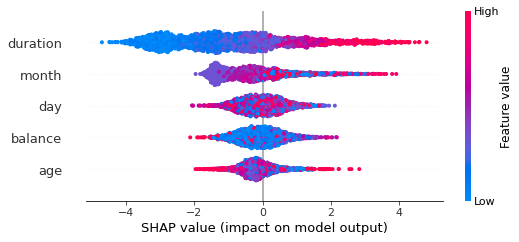

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train_[['duration', 'month', 'balance', 'day', 'age']])
shap.summary_plot(shap_values, x_train_[['duration', 'month', 'balance', 'day', 'age']], max_display=5)

При обучении только на пяти самых важных признаках предсказуемо падают метрики и меняется распределение важности признаков (как их порядок, так и вклад в зависимости от значения признака - так  возраст больше размываться и наибольший положительный и отрицательный вклад уже дают возрастные клиенты...
все-таки датасет не очень удачный, но уже есть как есть)